In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from patsy.builtins import *
import statsmodels.api as sm
import seaborn as sns

In [2]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575


1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.   

In [4]:
gdp_fit = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
gdp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        13:21:22   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.1381     26.087    -17.945      0.000    -519.279    -416.998
Year           0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     4.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
print(f"The coefficients for linear regression are listed below:")
gdp_fit.params

The coefficients for linear regression are listed below:


Intercept   -468.138140
Year           0.267722
dtype: float64

We get -468.138 as our intercept and year is 0.2677. So for every 0.2677 of a year we will decrease life expectancy by 468.318

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [12]:
gdp_fit_1990 = smf.ols("Life_Expectancy ~ I(Year>1990)", data=gdp_le).fit()
gdp_fit_1990.params

Intercept                 64.745253
I(Year > 1990)[T.True]     4.381894
dtype: float64

In [14]:
gdp_fit_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.12
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.54e-08
Time:                        13:21:26   Log-Likelihood:                -20139.
No. Observations:                5504   AIC:                         4.028e+04
Df Residuals:                    5502   BIC:                         4.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 64.7453      0.775     83.556      0.000      63.226      66.264
I(Year > 1990)[T.True]     4.3819      0.785      5.579      0.000       2.842       5.922
==============================================================================
Omnibus:                      441.762   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.020
Skew:                          -0.776   Prob(JB):                    3.01e-121
Kurtosis:                       3.119   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
gdp_fit_1990.params

Intercept                 64.745253
I(Year > 1990)[T.True]     4.381894
dtype: float64

These new coefficients say that for each 4.38 years, the slope(life expectancy) increases by 64.74. Based on the p value being nearly 0 we can conclude that this is indeed statistically significant. 

c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [43]:
pred_mean = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)
pred_mean['Life_Expectancy'] = gdp_fit.predict(pred_mean)

pred_mean


,Year,Life_Expectancy
0,1990.000000,64.628889
1,1990.653061,64.803728
2,1991.306122,64.978567
3,1991.959184,65.153406
4,1992.612245,65.328245
5,1993.265306,65.503084
6,1993.918367,65.677923
7,1994.571429,65.852762
8,1995.224490,66.027601
9,1995.877551,66.202440


In [45]:
actual_mean = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
actual_mean

,Year,Life_Expectancy
0,1990,64.745253
1,1991,65.021276
2,1992,65.217845
3,1993,65.218031
4,1994,65.339539
5,1995,65.956224
6,1996,66.200189
7,1997,66.437280
8,1998,66.556082
9,1999,66.916176


The actual result are 64-72 compared to the models result of 64-73. It holds up fairly well I'd say. The numbers aren't vastly different by any means. 

 d. Plot the actual values against your model's estimates for the mean life expectancy. 

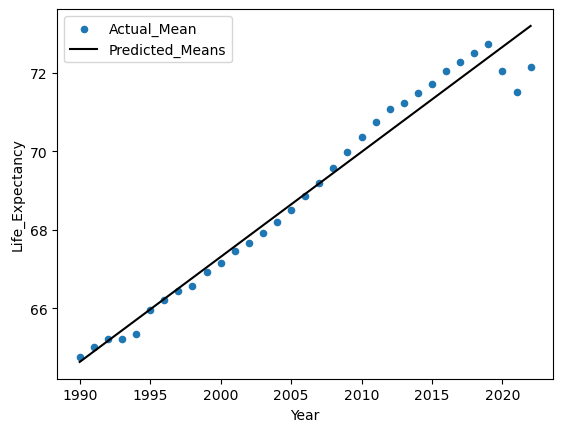

In [53]:
fig, ax = plt.subplots()
actual_mean.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax, label = 'Actual_Mean')
pred_mean.plot(kind="line", x="Year", y="Life_Expectancy", color="black", ax=ax, label = 'Predicted_Means');

e. Inspect the R-squared value for the model. does it make sense, given the plot? 

In [59]:
gdp_fit.rsquared

0.07154748843194658

It's a pretty small rsquared value so it seems that there's not a crazy variation going on between the model and the predicted values, which is pretty consistent with the plot above. 

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
    a. What coefficients do you get? Interpret the meaning of those coefficients.  

In [65]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463


In [69]:
gdp_2021_fit = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

In [71]:
gdp_2021_fit.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

When life expectancy increases 0.000257 the GDP Per Capita increases. 

 b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients? 

In [82]:
gdp_le_2021['GDP_Per_Capita_Thousands'] = gdp_le_2021['GDP_Per_Capita'] / 1000

C:\Users\lexil\AppData\Local\Temp\ipykernel_2608\3666080971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['GDP_Per_Capita_Thousands'] = gdp_le_2021['GDP_Per_Capita'] / 1000


In [84]:
gdp_2021_Thousands_fit = smf.ols("Life_Expectancy ~ GDP_Per_Capita_Thousands", data=gdp_le_2021).fit()

In [86]:
gdp_2021_Thousands_fit.params

Intercept                   65.949870
GDP_Per_Capita_Thousands     0.256892
dtype: float64

When life expectancy increases 0.256892 the GDP Per Capita in Thousands increases. 

c. Are the coefficients statistically significant?  

In [91]:
gdp_2021_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        13:49:47   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
gdp_2021_Thousands_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        13:50:25   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita_Thousands     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the P values for both gdp_2021_fit & gdp_2021_Thousands_fit are statistically significant considering their P-values are very small. 

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? 

What about one whose gdp per capita is $100,000?

In [132]:
gdp_2021_fit.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

In [136]:
print(f"The mean life expectancy for a country whose gdp per capital is $50,000 is listed below:")
gdp_50k = gdp_2021_fit.params['Intercept'] + gdp_2021_fit.params['GDP_Per_Capita']*50
gdp_50k

The mean life expectancy for a country whose gdp per capital is $50,000 is listed below:


65.96271442478731

In [138]:
print(f"The mean life expectancy for a country whose gdp per capital is $100,000 is listed below:")
gdp_100k = gdp_2021_fit.params['Intercept'] + gdp_2021_fit.params['GDP_Per_Capita']*100
gdp_100k

The mean life expectancy for a country whose gdp per capital is $100,000 is listed below:


65.97555901219634

  e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [161]:
gdp_2021_fit.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

In [169]:
pred_mean_50k = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)
pred_mean_50k['Life_Expectancy'] = gdp_2021_fit.predict(pred_mean_50k)

pred_mean_50k.head(2)

,GDP_Per_Capita,Life_Expectancy
0,714.066712,66.133308
1,3060.381549,66.736057


In [171]:
pred_mean_100k = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)
pred_mean_100k['Life_Expectancy'] = gdp_2021_fit.predict(pred_mean_100k)

pred_mean_100k.head(2)

,GDP_Per_Capita,Life_Expectancy
0,714.066712,66.133308
1,3060.381549,66.736057


In [175]:
Actual_2021_mean = gdp_le_2021.groupby('GDP_Per_Capita')['Life_Expectancy'].mean().reset_index()
Actual_2021_mean.head(2)

,GDP_Per_Capita,Life_Expectancy
0,714.066712,61.663
1,837.504686,53.895


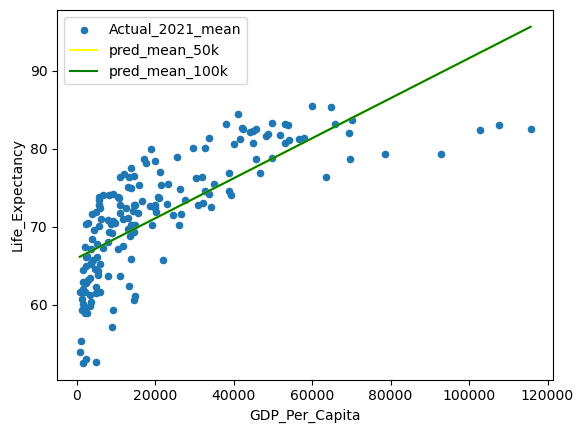

In [195]:
fig, ax = plt.subplots()
Actual_2021_mean.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax, label = 'Actual_2021_mean')
pred_mean_50k.plot(kind="line", x="GDP_Per_Capita", y="Life_Expectancy", color="yellow", ax=ax, label = 'pred_mean_50k');
pred_mean_100k.plot(kind="line", x="GDP_Per_Capita", y="Life_Expectancy", color="green", ax=ax, label = 'pred_mean_100k');

The model's fit doesn't appear to be something that fit's the best. We have quite a dip in the bottom left that doesn't quite line up with predictions. 

3. Now, fit a model for life expectancy based on the log of gdp per capita.  
    a. Inspect the coefficients for this model. Are they statistically significant?


   b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? 
    
    What about for those with a gdp per capita of $100,000?


   c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

In [ ]:
gdp_le_2021['GDP_Per_Capita_Thousands'] = gdp_le_2021['GDP_Per_Capita'] / 1000

In [ ]:
smf.ols("Life_Expectancy ~ GDP_Per_Capita_Thousands", data=gdp_le_2021).fit()